In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.drop(['PassengerId','Name','SibSp','Parch', 'Ticket','Cabin','Embarked'],axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


<Axes: xlabel='Sex', ylabel='Survived'>

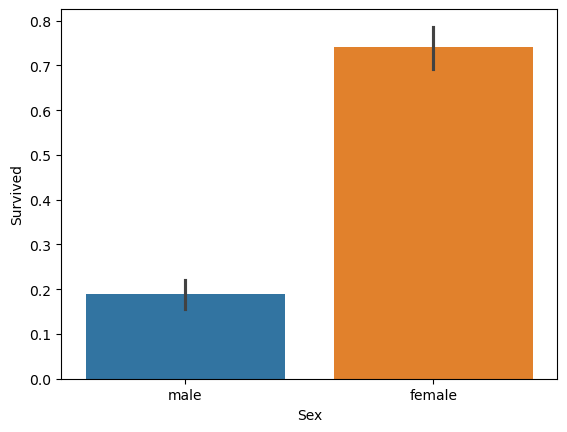

In [7]:
sns.barplot(x = df.Sex, y = df.Survived,hue=df.Sex)

In [8]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [9]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.info

<bound method DataFrame.info of      Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    2  38.000000  71.2833
2         3    2  26.000000   7.9250
3         1    2  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    2  19.000000  30.0000
888       3    2  29.699118  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]>

In [12]:
inputs.Sex.head()

0    1
1    2
2    2
3    2
4    1
Name: Sex, dtype: int64

In [13]:
inputs.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [14]:
X = inputs[['Pclass', 'Sex', 'Age', 'Fare']]

In [15]:
y = target

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.33, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
d = DecisionTreeClassifier()

In [20]:
d.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
d.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
d.score(X_test,y_test)

0.7457627118644068

In [23]:
X_test.head()

,Pclass,Sex,Age,Fare
709,3,1,29.699118,15.2458
439,2,1,31.000000,10.5000
840,3,1,20.000000,7.9250
720,2,2,6.000000,33.0000
39,3,2,14.000000,11.2417
